In [385]:
#Import necessary libraries
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#ML algorithm libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [386]:
train_titan = pd.read_csv('Data/train.csv')
test_titan = pd.read_csv('Data/test.csv')

In [387]:
train_titan.shape

(891, 12)

In [388]:
test_titan.shape

(418, 11)

In [389]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [390]:
test_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [391]:
train_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


***Data Columns***:

* PassengerId= Id of passenger
* Survived= (0=Dead, 1=Alive)
* Pclass= (1=first class, 2=second class, 3=third class)
* Name= Name of passenger
* Sex= gender of passenger (Male:Female)
* SibSp= count Siblings/spouses
* Parch= count Parents/Children
* Ticket= Ticket of the passenger
* Fare= Cost of the passenger (Float)
* Cabin= Cabin number
* Embarked= (C=Cherbourg, Q=Queenstown, S=Southampton)

In [392]:
train_titan.shape


(891, 12)

In [393]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


1. Hoeveel lege waarden heeft de dataset

In [394]:
total_nullval=train_titan.isnull().sum().sort_values(ascending=False)
print(total_nullval)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [395]:
percentage = round(total_nullval/train_titan.isna().count()*100,2)
print("percentage: \n", percentage.sort_values(ascending=False))



percentage: 
 Cabin          77.10
Age            19.87
Embarked        0.22
Ticket          0.00
Survived        0.00
SibSp           0.00
Sex             0.00
Pclass          0.00
PassengerId     0.00
Parch           0.00
Name            0.00
Fare            0.00
dtype: float64


In [396]:
train_titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [397]:
train_titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1, 'Missing data in features')

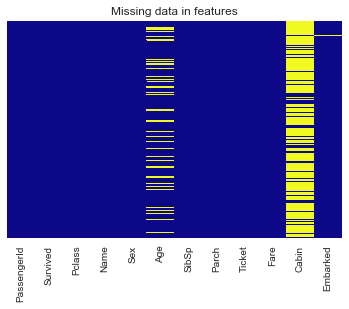

In [398]:
sns.heatmap(train_titan.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.title('Missing data in features')

Text(0.5, 1.0, 'In general how many passengers survived?')

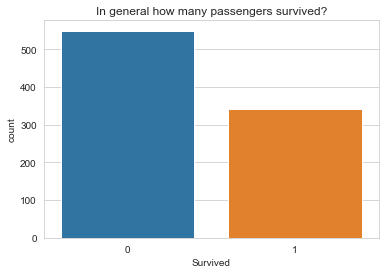

In [399]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_titan)
plt.title('In general how many passengers survived?')

Text(0.5, 1.0, 'How many men and women survived')

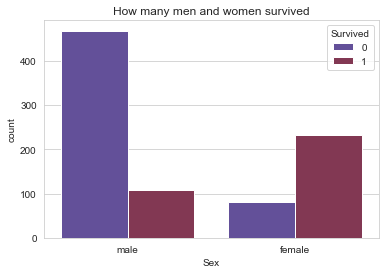

In [400]:
sns.countplot(x='Sex', data=train_titan, palette='twilight', hue='Survived')

plt.title('How many men and women survived')

Text(0.5, 1.0, 'How many passengers survived from each port embarkment')

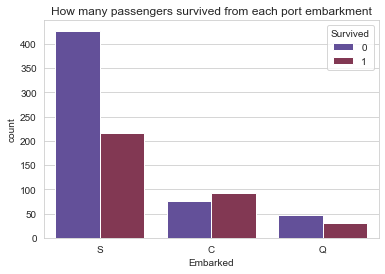

In [401]:
sns.countplot(x='Embarked', data=train_titan, palette='twilight', hue='Survived')

plt.title('How many passengers survived from each port embarkment')

**Embarked**
* C=Cherbourg, 
* Q=Queenstown, 
* S=Southampton

Op de grafiek is te zien dat de passagiers die ingestapt zijn in 'Cherbourgh' relatief meer overlevenden zijn en passagiers die ingestapt zijn vanuit 'Southampton' zijn er dubbel zoveel passagiers die gestorven zijn.

Text(0.5, 1.0, 'How many passengers survived in each passenger class')

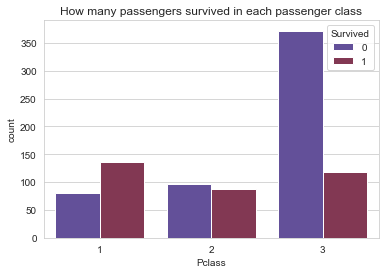

In [402]:
sns.countplot(x='Pclass', data=train_titan, palette='twilight', hue='Survived')
plt.title('How many passengers survived in each passenger class')

In de derde klasse waar er de meeste passagiers waren, waren er ook het meeste gestorven.

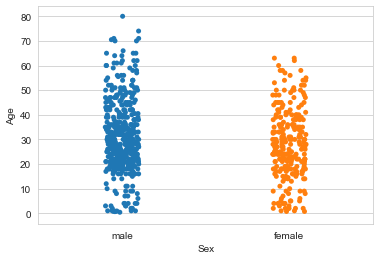

In [403]:
sns.stripplot(x='Sex', y='Age', data=train_titan, jitter=True)

In [404]:
#Imputation the NaN null values with the average age
data=[train_titan,test_titan]
#age=round(train_titan['Age'].mean(),0)


In [405]:
for d in data:
    d['Age']=d['Age'].interpolate()
    

In [406]:
train_titan.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1, 'Missing data in features')

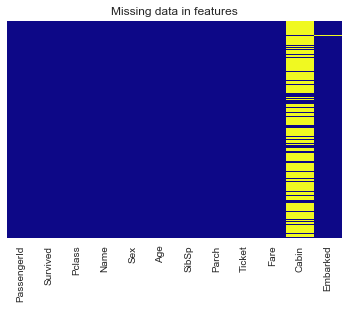

In [407]:
sns.heatmap(train_titan.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.title('Missing data in features')

In [408]:
#De Cabin Feature mist te veel aan data om de model te trainen
train_titan=train_titan.drop(columns=['Cabin'])
test_titan=test_titan.drop(columns=['Cabin'])
train_titan=train_titan.drop(columns=['Name'])
test_titan=test_titan.drop(columns=['Name'])
train_titan=train_titan.drop(columns=['Ticket'])
test_titan=test_titan.drop(columns=['Ticket'])



In [409]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.8+ KB


Text(0.5, 1, 'Missing data in features')

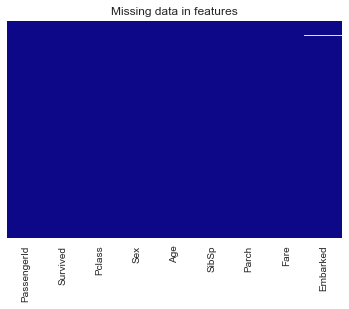

In [410]:
sns.heatmap(train_titan.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.title('Missing data in features')

In [411]:
train_titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

De meest voorkomende waarde in Embarked in de null values vullen

In [412]:
train_titan['Embarked'] = train_titan['Embarked'].fillna('S')

In [413]:
train_titan.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [414]:
test_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 22.9+ KB


In [415]:
data=[test_titan]
#Fare=round(train_titan['Fare'].mean(),0)


for d in data:
    d['Fare']=d['Fare'].interpolate()
    



In [416]:
test_titan['Fare']=round(train_titan['Fare'].mean(),0)

In [417]:
datas=[train_titan,test_titan]

In [418]:
#dict_gender = {'male':0, 'female':1}
#train_titan['Sex']=train_titan['Sex'].map(dict_gender)
#test_titan['Sex']=test_titan['Sex'].map(dict_gender)


In [419]:
train_titan['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [420]:
#one Hot-Encoding om de de categorical data naar integer waarde te veranderen

##Train data
enc_train_embarked = pd.get_dummies(train_titan['Embarked'], prefix='Embarked')
enc_train_gender = pd.get_dummies(train_titan['Sex'], prefix='Gender')


df_train_enc = pd.concat([train_titan, enc_train_embarked, enc_train_gender], axis=1)
train_titan= df_train_enc

train_titan = train_titan.drop(['Sex', 'Embarked'], axis=1)


##Test data
enc_test_embarked = pd.get_dummies(test_titan['Embarked'], prefix='Embarked')
enc_test_gender = pd.get_dummies(test_titan['Sex'], prefix='Gender')


df_test_enc = pd.concat([test_titan, enc_test_embarked, enc_test_gender], axis=1)
test_titan= df_test_enc

test_titan = test_titan.drop(['Sex', 'Embarked'], axis=1)
#train_titan['Embarked'].unique()
#dict_embarked = {'S':0, 'C':1,'Q':2}
#train_titan['Embarked']=train_titan['Embarked'].map(dict_embarked)
#test_titan['Embarked']=test_titan['Embarked'].map(dict_embarked)


In [421]:
train_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked_C     891 non-null    uint8  
 8   Embarked_Q     891 non-null    uint8  
 9   Embarked_S     891 non-null    uint8  
 10  Gender_female  891 non-null    uint8  
 11  Gender_male    891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.1 KB


In [422]:
test_titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Age            418 non-null    float64
 3   SibSp          418 non-null    int64  
 4   Parch          418 non-null    int64  
 5   Fare           418 non-null    float64
 6   Embarked_C     418 non-null    uint8  
 7   Embarked_Q     418 non-null    uint8  
 8   Embarked_S     418 non-null    uint8  
 9   Gender_female  418 non-null    uint8  
 10  Gender_male    418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.7 KB


In [423]:
X_train = train_titan.drop("Survived", axis=1)
Y_train = train_titan["Survived"]
X_train.shape, Y_train.shape

((891, 11), (891,))

In [424]:
# Logistic Regression
print("----Logistic Regression------")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
acc_log=round(logreg.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_log)
#Cross validation 
log_pred = model_selection.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)
acc_log_cv = round(metrics.accuracy_score(Y_train, log_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_log_cv)

----Logistic Regression------
Accuracy: 79.8
Accuracy CV 10-Fold:  78.9


In [425]:
#KNN 
print("----KNN------")
#K is hyperparameter plaats een waarde k in n_neighbors
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train, Y_train)
acc_knn = round(knn_model.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_knn)
#Cross validation 
knn_pred = model_selection.cross_val_predict(KNeighborsClassifier(), X_train, Y_train, cv=10)
acc_knn_cv = round(metrics.accuracy_score(Y_train, knn_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_knn_cv)

----KNN------
Accuracy: 74.07
Accuracy CV 10-Fold:  51.07


In [426]:
# Naive Bayes
print("----Naive Bayes------")
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train,Y_train)
acc_naive_bayes = round(naive_bayes_model.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_naive_bayes)
#Cross validation 
naive_bayes_pred = model_selection.cross_val_predict(GaussianNB(), X_train, Y_train, cv=10)
acc_naive_bayes_cv = round(metrics.accuracy_score(Y_train, naive_bayes_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_naive_bayes_cv)

----Naive Bayes------
Accuracy: 79.01
Accuracy CV 10-Fold:  78.56


In [427]:
# Support Vector Machines
print("----Support Vector Machines------")
svc_model = LinearSVC()
svc_model.fit(X_train,Y_train)
acc_svc = round(svc_model.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_svc)
#Cross validation 
svc_pred = model_selection.cross_val_predict(LinearSVC(), X_train, Y_train, cv=10)
acc_svc_cv = round(metrics.accuracy_score(Y_train, svc_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_svc_cv)


----Support Vector Machines------
Accuracy: 70.37
Accuracy CV 10-Fold:  61.62


In [428]:
#Decision_tree
print("----Decision tree------")
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_knn)
#Cross validation 
decision_tree_pred = model_selection.cross_val_predict(DecisionTreeClassifier(), X_train, Y_train, cv=10)
acc_decision_tree_cv = round(metrics.accuracy_score(Y_train, decision_tree_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_decision_tree_cv)

----Decision tree------
Accuracy: 74.07
Accuracy CV 10-Fold:  72.95


In [429]:
#Random Forest
print("----Random Forest------")
#Is een ensemble techniek waar er meerdere decision trees gegroepeerd worden
#n_estimators staat voor de aantal decision trees dat er gebruikt zal worden deze heeft default als waarde 100
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Accuracy:",acc_random_forest)
#Cross validation 
random_forest_pred = model_selection.cross_val_predict(RandomForestClassifier(), X_train, Y_train, cv=10)
acc_random_forest_cv = round(metrics.accuracy_score(Y_train, random_forest_pred) * 100, 2)
print("Accuracy CV 10-Fold: ", acc_random_forest_cv)

----Random Forest------
Accuracy: 100.0
Accuracy CV 10-Fold:  81.71


In [430]:
#accuracy scores

data=[['Logistic Regression',acc_log],['KNN',acc_knn],['Naive Bayes',acc_naive_bayes],['SVC',acc_svc],['Decision Tree',acc_decision_tree],['Random Forest',acc_random_forest]]
df = pd.DataFrame(data, columns = ['Name', 'Accuracy'])  


print("---Accuracy Scores---")
df.sort_values(by='Accuracy', ascending=False)



---Accuracy Scores---


,Name,Accuracy
4,Decision Tree,100.00
5,Random Forest,100.00
0,Logistic Regression,79.80
2,Naive Bayes,79.01
1,KNN,74.07
3,SVC,70.37


In [431]:
#Cross Validation accuracy score

data_cv=[['Logistic Regression',acc_log_cv],['KNN',acc_knn_cv],['Naive Bayes',acc_naive_bayes_cv],['SVC',acc_svc_cv],['Decision Tree',acc_decision_tree_cv],['Random Forest',acc_random_forest_cv]]
df_cv = pd.DataFrame(data_cv, columns = ['Name', 'Accuracy']) 

print("---Accuracy Scores with 10 Cross Validation---")
df_cv.sort_values(by='Accuracy', ascending=False)

---Accuracy Scores with 10 Cross Validation---


,Name,Accuracy
5,Random Forest,81.71
0,Logistic Regression,78.90
2,Naive Bayes,78.56
4,Decision Tree,72.95
3,SVC,61.62
1,KNN,51.07


Uit de tabel zien we dat er met Random Forest cross validation het hoogste accuracy behaalt wordt


In [432]:
kfold=KFold(n_splits=10, shuffle=True)
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=kfold)
confusion_matrix(Y_train, predictions)

array([[484,  65],
       [107, 235]], dtype=int64)

Uit de confusion matrix kunnen we afleiden hoeveel mensen er overleefd hebben en hoeveel gestorven
(True Positive, True Negative, False Positive, False Negative)

In [433]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7833333333333333
Recall: 0.6871345029239766


In [434]:
print("F1 Score:")
f1_score(Y_train, predictions)

F1 Score:


0.7320872274143303

In [435]:
test_titan.shape

(418, 11)

## Submission in kaggle

In [436]:
example_result=pd.read_csv('Data/gender_submission.csv')

predictions=random_forest.predict(test_titan)
example_result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [437]:
submission_gender = pd.DataFrame()
submission_gender['PassengerId'] = test_titan['PassengerId']
submission_gender['Survived'] = predictions # our model predictions on the test dataset

submission_gender.head(20)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [438]:
submission_gender.describe()
submission_gender.to_csv('./random_forest_submission.csv', index=False)
print('downloading...')

downloading...
